In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import dataframe_image as dfi
import re
plt.figure(figsize=(8, 6), dpi=120) 
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

<Figure size 960x720 with 0 Axes>

In [13]:
digs = pd.read_csv('GBA1/GBA1_all_path.csv')

In [15]:
digs = digs.drop(['Unnamed: 0'], axis = 1)

In [17]:
digs

,Mutation,N cases,N control,MAF in cases,MAF in control,ClinVar_CLNDN 1,p-value,OR
0,GDF1 NM_001492.6:c.1091T>C,4,1,0.013793,0.002101,not_provided&Congenital_heart_defects&_multipl...,0.182659,4.821621e+00
1,CFAP58 NM_001008723.2:c.1360C>T,3,1,0.010345,0.002101,Spermatogenic_failure_49,0.183996,4.715172e+00
2,NCF1 NM_000265.7:c.579G>A,1,6,0.003448,0.012605,not_provided&Granulomatous_disease&_chronic&_a...,0.213044,2.492244e-01
3,F11 NM_000128.4:c.403G>T,4,11,0.013793,0.023109,Plasma_factor_XI_deficiency&Inborn_genetic_dis...,0.245713,4.925437e-01
4,TMEM216 NM_001173990.3:c.218G>T,1,5,0.003448,0.010504,Meckel_syndrome&_type_2&Joubert_syndrome_2&not...,0.262185,2.845106e-01
...,...,...,...,...,...,...,...,...
176,DDX54 NM_024072.4:c.856G>A,0,1,0.000000,0.002101,Renal_hypoplasia&Multiple_renal_cysts&Reduced_...,0.999155,7.069579e-09
177,GCDH NM_000159.4:c.680G>C,0,1,0.000000,0.002101,NaN,0.999157,7.364164e-09
178,MSR1 NM_138715.3:c.76C>T,0,1,0.000000,0.002101,Ovarian_cancer,0.999161,7.990837e-09
179,GAA NM_000152.5:c.1552-3C>G,0,1,0.000000,0.002101,Cardiovascular_phenotype&Glycogen_storage_dise...,0.999161,7.990837e-09


In [861]:
tab = digs[digs['N cases'] > digs['N control']]

In [863]:
 digs.sort_values(by = 'N cases', ascending = False)[0:15]

,Mutation,N cases,N control,MAF in cases,MAF in control,ClinVar_CLNDN 1,p-value,OR
476,CREBBP NM_004380.3:c.1651C>A,15,25,0.051724,0.052521,Rubinstein-Taybi_syndrome&Inborn_genetic_disea...,0.762096,0.895322
243,DYSF NM_001130987.2:c.386G>A,10,17,0.034483,0.035714,Inborn_genetic_diseases&Muscular_dystrophy&not...,0.490508,0.739421
167,SYNE1 NM_182961.4:c.24349C>T,10,12,0.034483,0.025210,Autosomal_recessive_ataxia&_Beauce_type&Emery-...,0.386922,1.479662
234,ASPM NM_018136.5:c.646G>A,9,10,0.031034,0.021008,Inborn_genetic_diseases&not_specified&not_prov...,0.481414,1.422136
192,SLC5A2 NM_003041.4:c.1961A>G,9,11,0.031034,0.023109,not_specified&not_provided&Familial_renal_gluc...,0.421688,1.478888
33,BBS12 NM_152618.3:c.116T>C,9,9,0.031034,0.018908,not_specified&not_provided&Bardet-Biedl_syndro...,0.142809,2.104672
11,CYP1B1 NM_000104.4:c.1103G>A,9,5,0.031034,0.010504,Congenital_glaucoma&Glaucoma_3A&Irido-corneo-t...,0.087038,2.718236
446,LRRK2 NM_198578.4:c.6055G>A,9,14,0.031034,0.029412,not_provided&Autosomal_dominant_Parkinson_dise...,0.714123,1.184528
298,PJVK NM_001042702.5:c.86A>G,8,11,0.027586,0.023109,NaN,0.547208,1.353231
275,SBF1 NM_002972.4:c.3760C>T,8,9,0.027586,0.018908,NaN,0.520019,1.411392


In [865]:
 tab = digs.sort_values(by = 'p-value')[0:15]

In [867]:
digs[digs['N control'] == 0].sort_values(by = 'N cases', ascending = False)[0:15]

,Mutation,N cases,N control,MAF in cases,MAF in control,ClinVar_CLNDN 1,p-value,OR
834,GAD1 NM_000817.3:c.265C>T,4,0,0.013793,0.0,Neurodevelopmental_disorder_with_progressive_s...,0.998739,3.674100e+09
898,BRIP1 NM_032043.3:c.790C>T,3,0,0.010345,0.0,Hereditary_cancer-predisposing_syndrome&Fancon...,0.998954,2.643592e+09
892,SLC39A4 NM_130849.4:c.848C>T,3,0,0.010345,0.0,NaN,0.998945,2.291547e+09
886,OCA2 NM_000275.3:c.1320G>C,3,0,0.010345,0.0,Tyrosinase-positive_oculocutaneous_albinism&In...,0.998938,2.681900e+09
874,LTBP2 NM_000428.3:c.1796C>T,3,0,0.010345,0.0,Glaucoma_3&_primary_infantile&_B&Glaucoma_3&_p...,0.998876,4.077406e+09
868,ETFB NM_001985.3:c.292C>T,3,0,0.010345,0.0,not_specified&not_provided&Multiple_acyl-CoA_d...,0.998853,3.058302e+09
682,GRHPR NM_012203.2:c.286C>T,2,0,0.006897,0.0,NaN,0.998492,3.561868e+09
762,OTOG NM_001292063.2:c.1840C>T,2,0,0.006897,0.0,not_specified&Autosomal_recessive_nonsyndromic...,0.998675,9.881383e+08
756,PDE6B NM_000283.4:c.2548A>G,2,0,0.006897,0.0,Retinitis_pigmentosa&PDE6B-related_disease&not...,0.998669,1.167947e+09
751,PYGM NM_005609.4:c.848A>G,2,0,0.006897,0.0,not_provided&Glycogen_storage_disease&_type_V,0.998663,1.149955e+09


In [592]:
digs[digs['N control'] == 0].sort_values(by = 'N cases', ascending = False)[0:15]

,Mutation,N cases,N control,MAF in cases,MAF in control,ClinVar_CLNDN 1,p-value,OR
1080,CEP290 NM_025114.4:c.2090C>G,6,0,0.012397,0.0,Familial_aplasia_of_the_vermis&Nephronophthisi...,0.999031,3.637256e+09
1094,MC1R NM_002386.4:c.252C>A,6,0,0.012397,0.0,not_provided&Melanoma&_cutaneous_malignant&_su...,0.999036,4.353363e+09
851,POMC NM_000939.4:c.706C>G,5,0,0.010331,0.0,Obesity&_early-onset&_susceptibility_to&Obesit...,0.998680,1.652244e+09
780,SCN9A NM_001365536.1:c.3767A>G,5,0,0.010331,0.0,Neuropathy&_hereditary_sensory_and_autonomic&_...,0.998578,2.876005e+09
1008,WRN NM_000553.6:c.3785C>G,5,0,0.010331,0.0,NaN,0.999006,8.436300e+09
929,ABCB11 NM_003742.4:c.3524A>C,4,0,0.008264,0.0,not_specified&not_provided&Progressive_familia...,0.998782,1.571540e+09
941,TNS2 NM_170754.4:c.4070A>T,4,0,0.008264,0.0,NaN,0.998816,1.107139e+09
942,SI NM_001041.4:c.2923T>C,4,0,0.008264,0.0,NaN,0.998817,1.394057e+09
944,FKBP10 NM_021939.4:c.1307T>C,4,0,0.008264,0.0,not_specified&not_provided&Osteogenesis_imperf...,0.998833,8.553118e+08
938,PKHD1 NM_138694.4:c.5134G>A,4,0,0.008264,0.0,NaN,0.998808,1.606345e+09


In [762]:
dfi.export(tab,"mytable.png")

In [23]:
filtr = ['neurological', 'ataxia', 'dementia', 'Parkinson', 'Alzheimer', 'neurodevelopmental']
clnd = digs[digs['ClinVar_CLNDN 1'].notna()]
res = clnd[clnd['ClinVar_CLNDN 1'].str.contains('|'.join(filtr))]

In [25]:
res

,Mutation,N cases,N control,MAF in cases,MAF in control,ClinVar_CLNDN 1,p-value,OR
9,MPO NM_000250.2:c.2031-2A>C,3,4,0.010345,0.008403,not_provided&Myeloperoxidase_deficiency&Alzhei...,0.334416,2.189196e+00
31,LRRK2 NM_198578.4:c.6055G>A,9,14,0.031034,0.029412,not_provided&Autosomal_dominant_Parkinson_dise...,0.714123,1.184528e+00
44,COQ4 NM_016035.5:c.718C>T,1,1,0.003448,0.002101,Inborn_genetic_diseases&Spastic_ataxia&Neonata...,0.814855,1.398743e+00
63,PMM2 NM_000303.3:c.422G>A,2,0,0.006897,0.000000,Cerebellar_ataxia&Cerebral_palsy&Poor_speech&S...,0.998653,1.550977e+09
72,VPS41 NM_014396.4:c.1984C>T,0,2,0.000000,0.004202,Spinocerebellar_ataxia&_autosomal_recessive_29,0.998698,1.485687e-09
85,PRKN NM_004562.3:c.823C>T,1,0,0.003448,0.000000,Young-onset_Parkinson_disease&Neoplasm_of_ovar...,0.999018,3.007538e+09
106,KARS1 NM_005548.3:c.599C>T,1,0,0.003448,0.000000,Autosomal_recessive_nonsyndromic_hearing_loss_...,0.999066,1.039828e+09


In [922]:
res.to_csv('LRRK2/LRRK2_unc_neur.csv')

In [760]:
tab = res.sort_values(by = 'p-value')[0:20]

In [869]:
first = 'NM_000157.4:c.1226A>G'

In [871]:
second = 'NM_000817.3:c.265C>T'

In [873]:
folder = 'GBA_unc'

In [875]:
covar = pd.read_table('covar_AMP_PD_old.txt', sep = '\t')
covar['Patient'] = covar['FID'] + '_' + covar['IID'] +'.csv'
covar = covar.astype({'Patient':str})
covar = covar.set_index('Patient')

In [877]:
path = os.getcwd() 
l = os.listdir(path)
ls = [i for i in l if i.endswith('csv')]
df = pd.DataFrame()
for i in ls:
    d = pd.read_csv(i)
    print(f'{i} : {len(d)}')
    df = pd.concat([df, d])
df = df.rename(columns = {'Unnamed: 0': 'Patient'})
#df = df[(df['ClinVar_CLNSIG'] == 'Conflicting_interpretations_of_pathogenicity') == False]
#df = df[(df['ClinVar_CLNSIG'] == 'Conflicting_interpretations_of_pathogenicity&risk_factor') == False]
#df = df[(df['ClinVar_CLNSIG'] == 'Conflicting_interpretations_of_pathogenicity&other') == False]
#df = df[(df['ClinVar_CLNSIG'] == 'Conflicting_interpretations_of_pathogenicity&association') == False]
d#f = df[(df['ClinVar_CLNSIG'] == 'Conflicting_interpretations_of_pathogenicity&drug_response') == False]
#df = df[(df['ClinVar_CLNSIG'] == 'Conflicting_interpretations_of_pathogenicity&association&risk_factor') == False]
df = df[df['gnomADg_AF_NFE'] < 0.01]
df = df[df['CADD_PHRED'] > 20]
df = df[df['CAROL'].notna()]
df = df.query('CAROL.str.contains("Deleterious")')
df = df.set_index('Patient')
aggfuncs = ['unique']
patients = df.groupby('Patient')[['SYMBOL','ID', 'HGVSc', 'gnomADg_AF_NFE', 'ClinVar_CLNDN']].agg(lambda x: list(x))
#dfs = dfs.astype({'CADD_PHRED':float})


10_filtration_onlyClinVar.csv : 11785
11_filtration_onlyClinVar.csv : 18886
12_filtration_onlyClinVar.csv : 11267
13_filtration_onlyClinVar.csv : 5764
14_filtration_onlyClinVar.csv : 10500
15_filtration_onlyClinVar.csv : 10506
16_filtration_onlyClinVar.csv : 15853
17_filtration_onlyClinVar.csv : 15502
18_filtration_onlyClinVar.csv : 4577
19_filtration_onlyClinVar.csv : 12083
1_filtration_onlyClinVar.csv : 25988
21_filtration_onlyClinVar.csv : 3669
22_filtration_onlyClinVar.csv : 4830
2_filtration_onlyClinVar.csv : 35708
3_filtration_onlyClinVar.csv : 12305
4_filtration_onlyClinVar.csv : 11289
5_filtration_onlyClinVar.csv : 14478
6_filtration_onlyClinVar.csv : 14417
7_filtration_onlyClinVar.csv : 12047
8_filtration_onlyClinVar.csv : 10825
9_filtration_onlyClinVar.csv : 12727


In [879]:
patients

,SYMBOL,ID,HGVSc,gnomADg_AF_NFE,ClinVar_CLNDN
Patient,,,,,
BF-1001_BF-1001.csv,"[CEP164, PKD1, PLOD1, DEPDC5, FN1, PDE11A, OBS...","[rs143659874, rs144979397, rs149425237, rs1855...","[NM_014956.5:c.380C>A, NM_001009944.3:c.8293C>...","[0.00516024, 0.00743071, 0.00086632, 0.0003998...","[not_provided&Nephronophthisis_15, Inborn_gene..."
BF-1002_BF-1002.csv,"[MYO3A, MYBPC3, SERPINA1, TBCE, TTC21B, VCAN, ...","[rs72787346, rs375776406, rs28929470, rs140662...","[NM_017433.5:c.1559C>T, NM_000256.3:c.2980C>T,...","[0.00273224, 0.00026688, 0.00346852, 0.0010658...",[not_provided&not_specified&Autosomal_recessiv...
BF-1003_BF-1003.csv,"[TTLL5, PKD1, STAT5B, CPS1, SLC3A1, SPINK5, CP...","[rs142169707, rs148812376, rs148793995, rs1148...","[NM_015072.5:c.2891G>A, NM_001009944.3:c.9829C...","[0.00333023, 0.000867129, 6.66667e-05, 0.00773...","[not_specified&not_provided, Autosomal_dominan..."
BF-1004_BF-1004.csv,"[GJB6, MIPEP, ATP7B, HEXA, FBN3, SBF1, NBAS, S...","[rs200172266, rs150167906, rs201738967, rs1219...","[NM_001110219.3:c.212T>C, NM_005932.4:c.590T>C...","[0.0006, 0.00113303, 0.000400053, 0.00306585, ...",[not_provided&Autosomal_recessive_nonsyndromic...
BF-1005_BF-1005.csv,"[DGKZ, NUP93, HYDIN, MYO18B, NLRC4, PLS1, FBN2...","[rs76583617, rs145146218, rs79607350, rs149103...","[NM_001199267.2:c.2660C>G, NM_014669.5:c.1162C...","[0.00633925, 0.00239872, 0.00319787, 0.0068620...","[atypical_cerebral_palsy&not_provided, Nephrot..."
...,...,...,...,...,...
SY-PDXX265ZZE_SY-PDXX265ZZE.csv,"[TGM5, NTHL1, FMN2, COL6A3, FN1, CHRND, TF, MR...","[rs112292549, rs148104494, rs146681532, rs1442...","[NM_201631.4:c.337G>T, NM_002528.7:c.274C>T, N...","[0.00394016, 0.00133583, 0.00442359, 0.0009330...",[Inborn_genetic_diseases&not_provided&Acral_pe...
SY-PDYY549CXW_SY-PDYY549CXW.csv,"[NCKAP1L, ITGA7, SH2B3, FANCA, RHBDF2, TNFRSF1...","[rs149360088, rs149081471, rs202080221, rs1392...","[NM_005337.5:c.455G>A, NM_002206.3:c.2569G>A, ...","[0.00326406, 0.00495779, 0.00086852, 0.0043976...","[not_provided, not_provided&Congenital_muscula..."
SY-PDYZ339GYL_SY-PDYZ339GYL.csv,"[ERCC4, PHKB, MC1R, SPG7, GAA, FLCN, KIF1A, DY...","[rs1799802, rs34667348, rs1110400, rs61755320,...","[NM_005236.3:c.1135C>T, NM_000293.3:c.1969C>A,...","[0.00648222, 0.00419776, 0.0096757, 0.00373832...",[Xeroderma_pigmentosum&_group_F&Cockayne_syndr...


from functions_Park_no import all_mutations
df_all = all_mutations(folder)

In [882]:
from functions_Park_no import combinations_of_mutations
df_comb = combinations_of_mutations(first, second, covar, patients)

In [884]:
from functions_Park_no import first_mutation
df_first = first_mutation(first, second, covar, patients)

In [886]:
df_first.sample(1)

,FID,IID,PAT,MAT,Sex,Status,Age,SYMBOL,ID,HGVSc,gnomADg_AF_NFE,ClinVar_CLNDN
Patient,,,,,,,,,,,,
PP-58270_PP-58270.csv,PP-58270,PP-58270,0,0,2,1,64,"[CDH23, PCDH15, TMEM216, HPS5, ATM, LRRK2, HIF...","[rs200251748, rs111033436, rs201108965, rs1474...","[NM_022124.6:c.7999G>C, NM_001384140.1:c.1039C...","[6.67379e-05, 0.00399893, 0.0, 0.000333289, 0....",[CDH23-Related_Disorders&not_provided&Usher_sy...


In [888]:
from functions_Park_no import second_mutation
df_second = second_mutation(first, second, covar, patients)

In [890]:
df_second.sample(1)

,FID,IID,PAT,MAT,Sex,Status,Age,SYMBOL,ID,HGVSc,gnomADg_AF_NFE,ClinVar_CLNDN
Patient,,,,,,,,,,,,
PP-41055_PP-41055.csv,PP-41055,PP-41055,0,0,2,2,82,"[VWF, LRRK2, CENPJ, KIF1C, CHRNB1, KRT17, TCF3...","[rs61750603, rs34637584, rs141844033, rs145650...","[NM_000552.5:c.5191T>A, NM_198578.4:c.6055G>A,...","[0.00059976, 0.000333244, 0.000199814, 6.68003...",[not_specified&von_Willebrand_disease_type_2&v...


In [892]:
df_comb.Age.describe()

count     4.000000
mean     59.000000
std       8.679478
min      49.000000
25%      55.000000
50%      58.500000
75%      62.500000
max      70.000000
Name: Age, dtype: float64

         Male  Female
case        3       1
control     0       0 comb
         Male  Female
case       82      59
control    84     154 first
         Male  Female
case        3       3
control     4       1 second


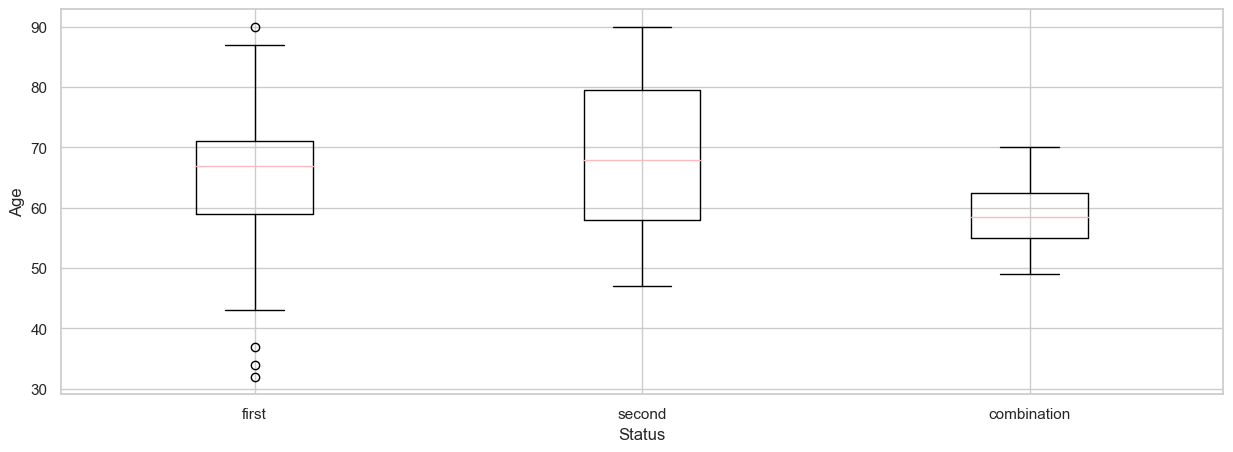

,First mutation,Second Mutation,Combination
Male,166.000000,7.0,3.0
Female,213.000000,4.0,1.0
Case,141.000000,6.0,4.0
Control,238.000000,5.0,0.0
Age,65.092199,68.5,59.0


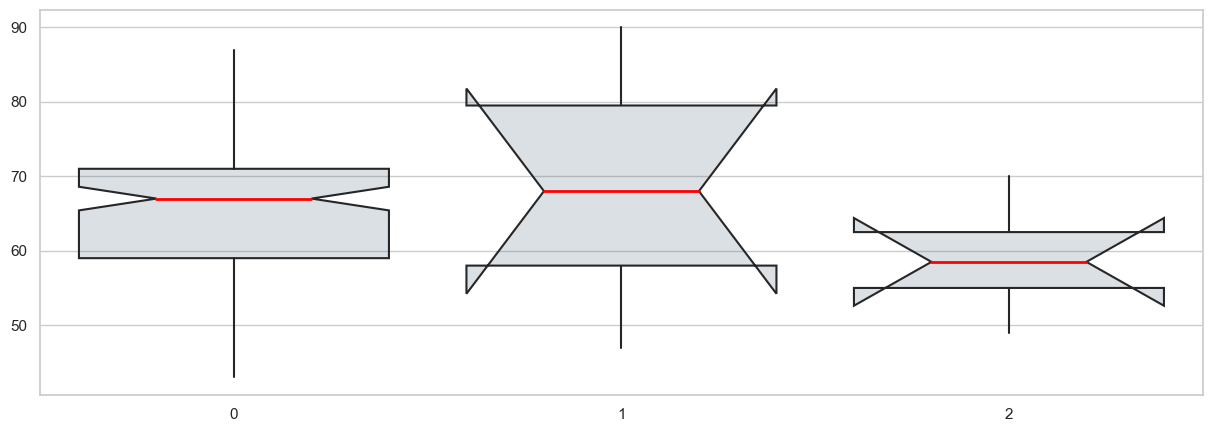

In [894]:
from functions_Park_no import comparing_demography
comparing_demography(df_first, df_second, df_comb)



Kruskal Test: statistic=16.1865, p-value=0.0003


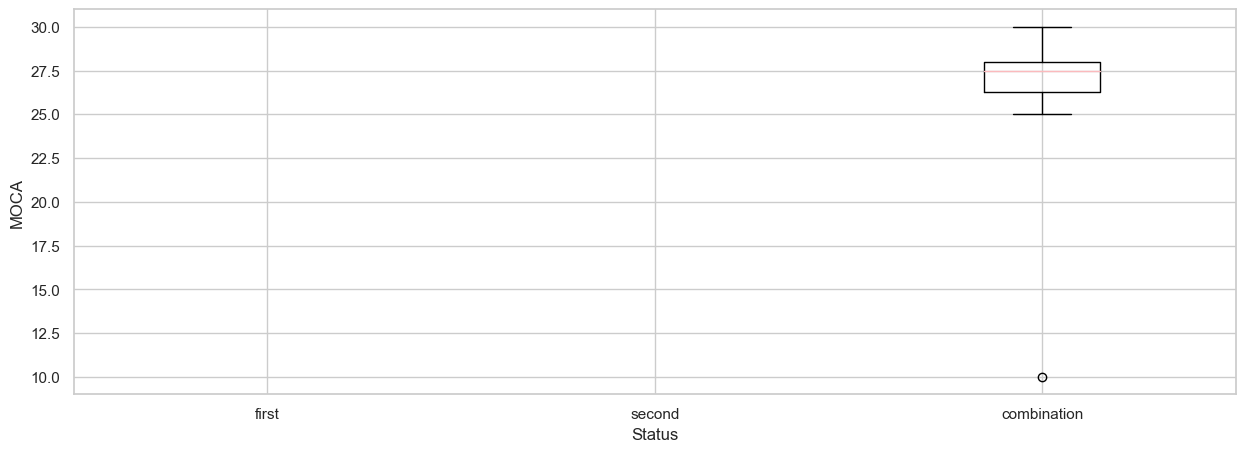

,First mutation,Second mutation,Combination
Mean MOCA,25.694006,28.526316,25.8


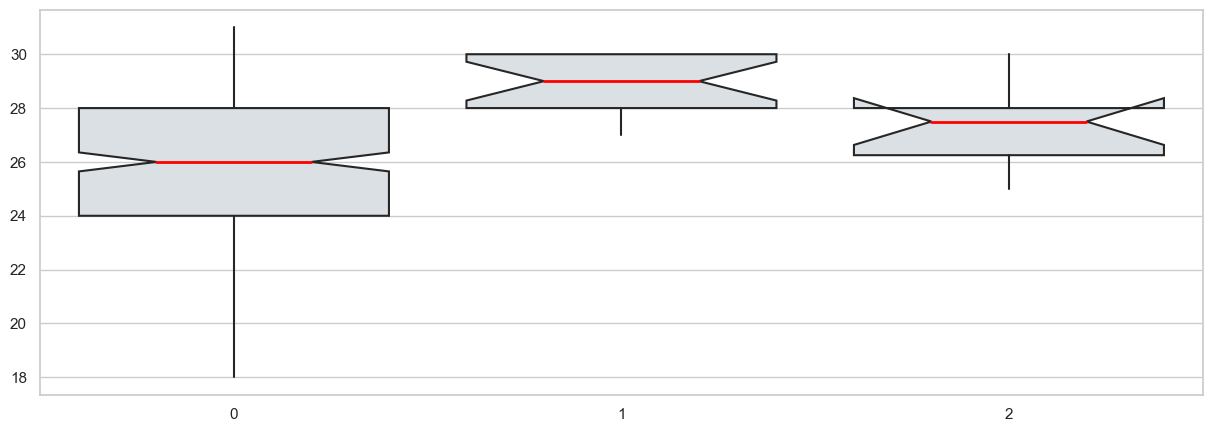

In [895]:
from functions_Park_no import comparing_MOCA
comparing_MOCA(df_first, df_second, df_comb)


Kruskal Test: statistic=0.6895, p-value=0.7084


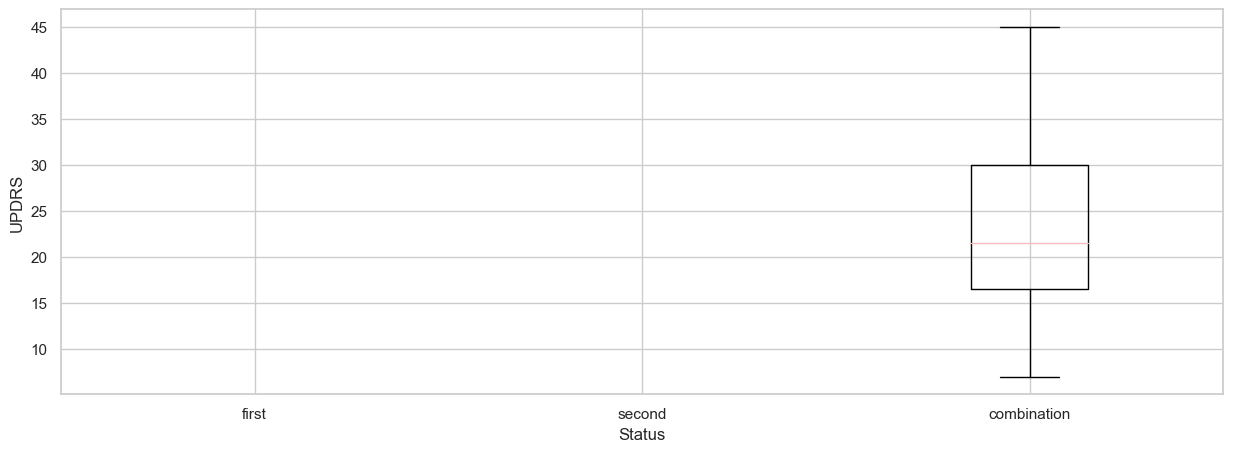

,First mutation,Second mutation,Combination
Mean UPDRS,24.994695,22.904762,23.375


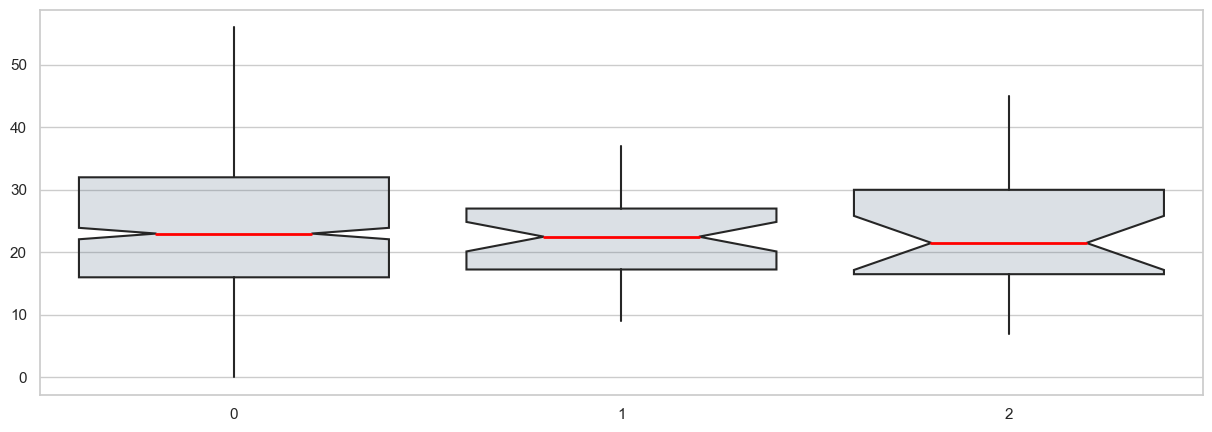

In [897]:
from functions_Park_no import comparing_UPDRS
comparing_UPDRS(df_first, df_second, df_comb)

In [898]:
df_comb

,FID,IID,PAT,MAT,Sex,Status,Age,SYMBOL,ID,HGVSc,gnomADg_AF_NFE,ClinVar_CLNDN
FID,,,,,,,,,,,,
PP-71189,PP-71189,PP-71189,0,0,1,2,60,"[SLC38A8, GBA, CFHR5, GAD1, TTC7A, TTC7A, SUMF...","[rs139373929, rs76763715, rs141321678, rs15084...","[NM_001080442.3:c.848A>C, NM_000157.4:c.1226A>...","[6.67646e-05, 0.00187166, 0.000800747, 0.0, 0....",[not_provided&Foveal_hypoplasia_-_optic_nerve_...
PP-41461,PP-41461,PP-41461,0,0,1,2,49,"[ERCC6, CEP57, RELT, ERCC5, OCA2, NOD2, CHRNE,...","[rs150935953, rs139110744, rs139368769, rs1463...","[NM_000124.4:c.670C>T, NM_014679.5:c.95C>T, NM...","[6.66223e-05, 0.000200053, 0.000333645, 0.0021...",[Inborn_genetic_diseases&not_specified&not_pro...
PP-41780,PP-41780,PP-41780,0,0,1,2,70,"[SEC23A, KIF23, BCKDK, MYH8, MYH2, KRT17, DOCK...","[rs144656181, rs61751120, rs142542453, rs14121...","[NM_006364.4:c.1906C>T, NM_001367805.3:c.293A>...","[0.0, 0.00193205, 0.000267344, 0.00646322, 0.0...",[Inborn_genetic_diseases&Craniolenticulosutura...
PP-53339,PP-53339,PP-53339,0,0,2,2,57,"[SPG11, MYH3, ASPA, SLC4A1, TYK2, GBA, GAD1, S...","[rs139334167, rs139480342, rs28940279, rs12191...","[NM_025137.4:c.7069C>T, NM_002470.4:c.875C>G, ...","[0.0011992, 0.000133245, 0.000133227, 0.000200...",[Inborn_genetic_diseases&not_provided&Heredita...
